In [17]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
# Load the data
listings = pd.read_csv('data/listings.csv')
calendar = pd.read_csv('data/calendar.csv')
reviews = pd.read_csv('data/reviews.csv')

In [18]:
def keep_columns(dataset, columns_to_keep, save_path):
    """
    Keep only the specified columns in a dataset and save the updated dataset to a file.

    Parameters:
    - dataset (pd.DataFrame): The dataset to modify.
    - columns_to_keep (list): List of column names to retain.
    - save_path (str): Path to save the updated dataset.

    Returns:
    - pd.DataFrame: The updated dataset with only the specified columns.
    """
    # Keep only specified columns
    updated_dataset = dataset[columns_to_keep]

    # Save the updated dataset to the specified path
    updated_dataset.to_csv(save_path, index=False)

    return updated_dataset

In [19]:
def missing_values_summary(df, dataset_name):
    """
    Calculate and return the missing values summary for a dataset.

    Parameters:
    - df (pd.DataFrame): The dataset to analyze.
    - dataset_name (str): The name of the dataset (used for clarity in reports or logs).

    Returns:
    - pd.DataFrame: A DataFrame with two columns:
        - 'Missing Count': The total count of missing values in each column.
        - 'Percentage': The percentage of missing values relative to the dataset size, sorted in descending order.
    """
    missing = df.isnull().sum()
    percentage = (missing / len(df)) * 100
    return pd.DataFrame({'Missing Count': missing, 'Percentage': percentage}).sort_values(by='Percentage', ascending=False)

In [48]:
def plot_bar(data, title, xlabel, ylabel, color='blue', rotation=0, ylim=None, xticks_labels=None):
    """
    Create and display a bar plot.

    Parameters:
    - data (pd.Series or pd.DataFrame): The data to plot (index as labels and values as heights).
    - title (str): The title of the plot.
    - xlabel (str): The label for the x-axis.
    - ylabel (str): The label for the y-axis.
    - color (str): The color of the bars. Default is 'blue'.
    - rotation (int): The rotation angle for x-axis labels. Default is 0.
    - ylim (tuple): A tuple (min, max) to set the y-axis limits. Default is None.
    - xticks_labels (list): Custom labels for the x-axis ticks. Default is None.

    Returns:
    - None
    """
    data.plot(kind='bar', color=color, title=title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if ylim:
        plt.ylim(ylim)
    if xticks_labels:
        plt.xticks(ticks=range(len(data)), labels=xticks_labels, rotation=rotation)
    else:
        plt.xticks(rotation=rotation)
    plt.show()

In [49]:
def plot_box(data, x_column, y_column, title, xlabel, ylabel):
    """
    Create and display a box plot for visualizing the distribution of a numerical variable across categories.

    Parameters:
    - data (pd.DataFrame): The dataset to use.
    - x_column (str): The categorical variable for the x-axis.
    - y_column (str): The numerical variable for the y-axis.
    - title (str): The title of the plot.
    - xlabel (str): The label for the x-axis.
    - ylabel (str): The label for the y-axis.

    Returns:
    - None
    """
    data.boxplot(column=y_column, by=x_column, grid=False)
    plt.title(title)
    plt.suptitle('')  # Removes the default subtitle
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [50]:
def convert_to_boolean(dataset, columns):
    """
    Convert 't'/'f' values in specified columns to boolean True/False.

    Parameters:
    - dataset (pd.DataFrame): The dataset to modify.
    - columns (list): List of column names to convert.

    Returns:
    - pd.DataFrame: The dataset with updated boolean columns.
    """
    updated_dataset = dataset.copy()
    for column in columns:
        if column in updated_dataset.columns:
            updated_dataset[column] = updated_dataset[column].map({'t': True, 'f': False})
    return updated_dataset

In [51]:
def get_season(month):
     """
    Determine the season based on the given month.

    Parameters:
    - month (int): The numeric representation of the month (1 for January, 12 for December).

    Returns:
    - str: The corresponding season ('Winter', 'Spring', 'Summer', or 'Fall').
    """
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

In [63]:
def simplify_bathrooms(bathrooms):
    """
    Simplify the bathroom count into categories.

    Parameters:
    - bathrooms (float): The number of bathrooms for a listing.

    Returns:
    - str: A simplified category for the number of bathrooms:
        - "Shared (0 or 0.5)" for less than 1 bathroom.
        - "4+" for 4 or more bathrooms.
        - The integer value for bathrooms if it falls between 1 and 3.99.
    """
    if bathrooms < 1:
        return "Shared (0 or 0.5)"
    elif bathrooms >= 4:
        return "4+"
    else:
        return int(bathrooms)

In [53]:
# following the CRISP-DM process
# this is my 3 business questions:

# 1. Which seasons of the year have the highest room availability, and which season is the busiest?

# 2. What factors influence the price of listings in Seattle?

# 3. What factors influence a guest's decision to book a listing?


In [54]:
# Question (1) : Which seasons of the year have the highest room availability, and which season is the busiest?
# using the Calendar dataset to solve this 

# Drop the 'price' column from the calendar dataset as I will not need it to answer my questions 
calendar_columns_to_keep = ['listing_id', 'date', 'available']
cleaned_calendar = keep_columns(calendar, calendar_columns_to_keep, 'data/cleaned_calendar.csv')

# Convert available to boolean values
boolean_columns = ['available']
cleaned_calendar = convert_to_boolean(cleaned_calendar, boolean_columns)

# add the month column to extract the month value only
cleaned_calendar['month'] = pd.to_datetime(cleaned_calendar['date']).dt.month

# add the season column
cleaned_calendar['season'] = cleaned_calendar['month'].apply(get_season)

# Save the updated dataset to a new CSV file
cleaned_calendar.to_csv('cleaned_calendar.csv', index=False)

# check the dataset if it is properly cleaned 
print(cleaned_calendar.head())


   listing_id        date  available  month  season
0      241032  2016-01-04       True      1  Winter
1      241032  2016-01-05       True      1  Winter
2      241032  2016-01-06      False      1  Winter
3      241032  2016-01-07      False      1  Winter
4      241032  2016-01-08      False      1  Winter


In [55]:
# Calculate availability counts by season
season_availability = cleaned_calendar.groupby('season')['available'].apply(lambda x: (x == True).sum())

In [56]:
print(season_availability)

season
Fall      241464
Spring    239946
Summer    227813
Winter    225319
Name: available, dtype: int64


In [57]:
# check if there are missing values 
missing_values_summary(cleaned_calendar, "Calendar")

,Missing Count,Percentage
listing_id,0,0.0
date,0,0.0
available,0,0.0
month,0,0.0
season,0,0.0


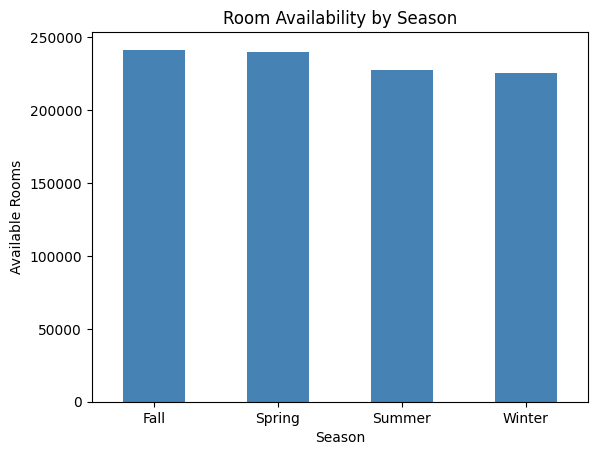

In [58]:
# visualize my findings for Q1 : 
plot_bar(
    data=season_availability,
    title='Room Availability by Season',
    xlabel='Season',
    ylabel='Available Rooms',
    color='steelblue',
    rotation=0
)

price                   1.000000
accommodates            0.652218
bedrooms                0.627624
bathrooms               0.516009
host_is_superhost       0.012131
host_has_profile_pic   -0.021380
Name: price, dtype: float64


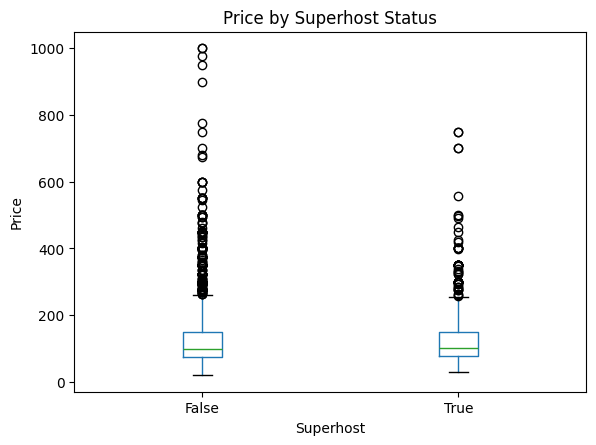

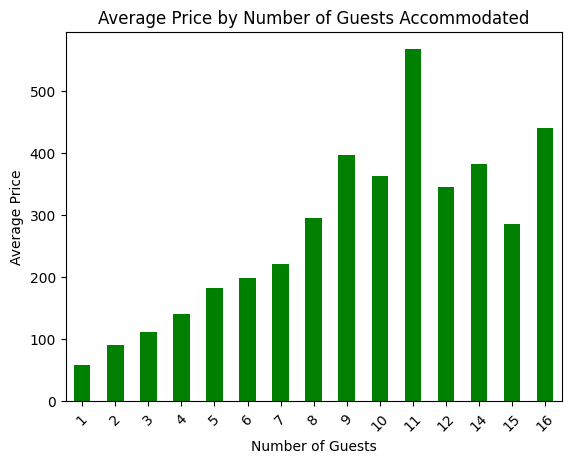

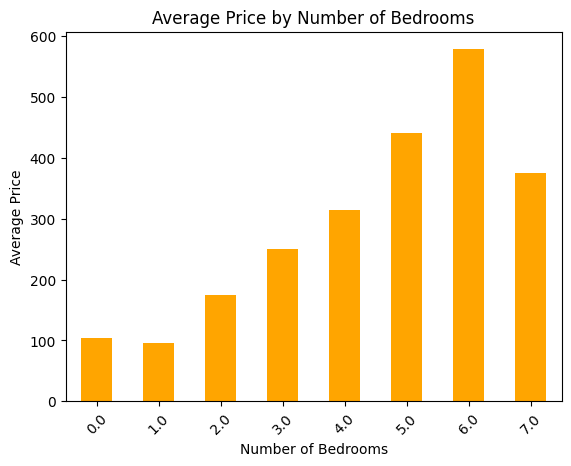

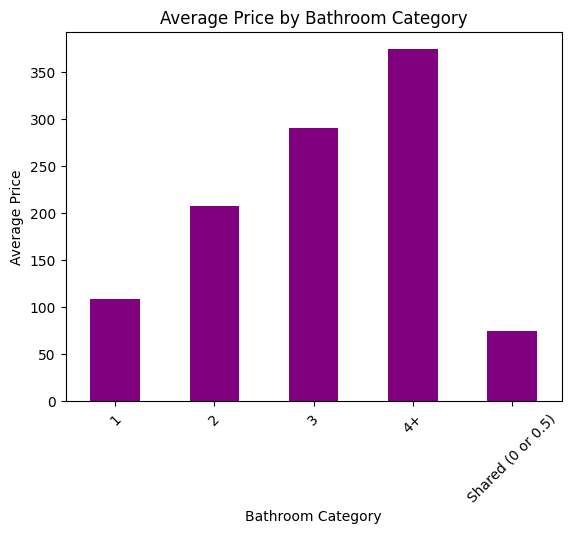

In [59]:
# Question (2): What factors influence the price of listings in Seattle?
# using the Listings dataset to solve this 

# Drop the columns from the listings dataset as I will not need them to answer my questions
listings_columns_to_keep = ['id', 'price', 'accommodates', 'bedrooms', 'bathrooms', 'host_is_superhost', 'host_has_profile_pic']
cleaned_listings = keep_columns(listings, listings_columns_to_keep, 'data/cleaned_listings.csv')

# Convert 't'/'f' to boolean in the Listings
boolean_columns = ['host_is_superhost', 'host_has_profile_pic']
cleaned_listings = convert_to_boolean(cleaned_listings, boolean_columns)

# Check if there are missing values
missing_values_summary(cleaned_listings, "Listings")

# Select relevant columns for correlation analysis
correlation_columns = ['price', 'bedrooms', 'bathrooms', 'accommodates', 'host_has_profile_pic', 'host_is_superhost']

# Calculate correlations with 'price'
correlations = cleaned_listings[correlation_columns].corr()['price'].sort_values(ascending=False)
print(correlations)

# Visualize: Box Plot for Superhost Status
plot_box(
    data=cleaned_listings,
    x_column='host_is_superhost',
    y_column='price',
    title='Price by Superhost Status',
    xlabel='Superhost',
    ylabel='Price'
)

# Visualize: Bar Plot for Accommodates
accommodates_price = cleaned_listings.groupby('accommodates')['price'].mean()
plot_bar(
    data=accommodates_price,
    title='Average Price by Number of Guests Accommodated',
    xlabel='Number of Guests',
    ylabel='Average Price',
    color='green',
    rotation=45
)

# Visualize: Bar Plot for Bedrooms
bedrooms_price = cleaned_listings.groupby('bedrooms')['price'].mean()
plot_bar(
    data=bedrooms_price,
    title='Average Price by Number of Bedrooms',
    xlabel='Number of Bedrooms',
    ylabel='Average Price',
    color='orange',
    rotation=45
)

# Simplify the 'bathrooms' column in the dataset
cleaned_listings['bathroom_category'] = cleaned_listings['bathrooms'].apply(simplify_bathrooms)

# Visualize the average price by bathroom category
bathroom_price = cleaned_listings.groupby('bathroom_category')['price'].mean()

# Plot using the plot_bar function
plot_bar(
    data=bathroom_price,
    title='Average Price by Bathroom Category',
    xlabel='Bathroom Category',
    ylabel='Average Price',
    color='purple',
    rotation=45
)


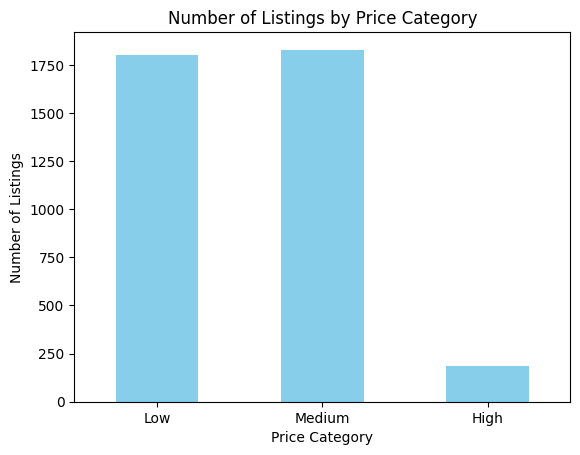

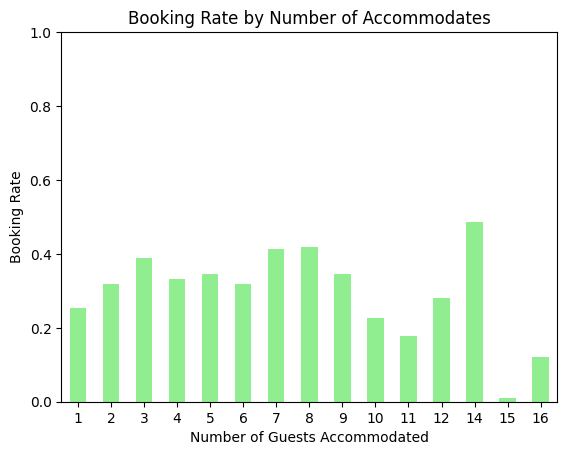

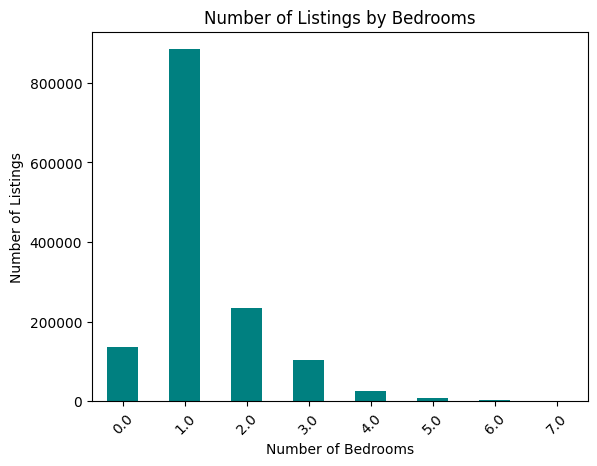

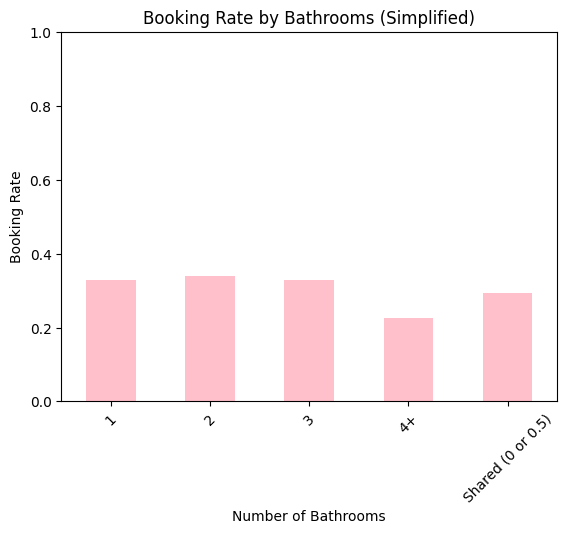

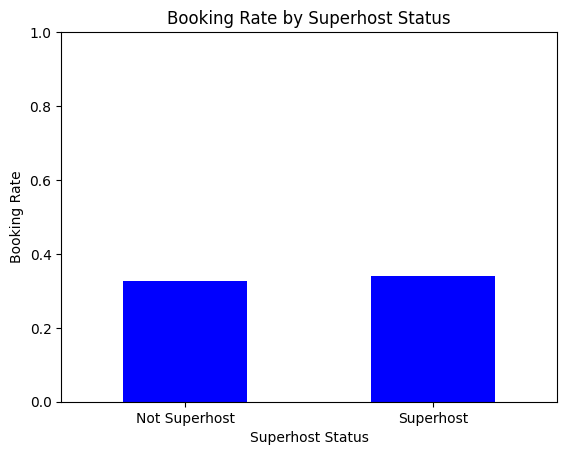

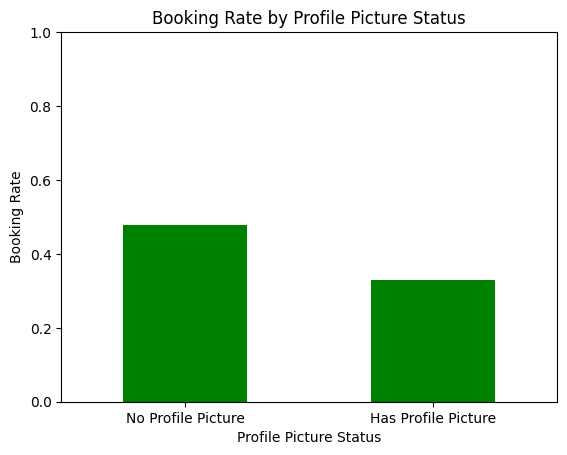

In [67]:
# Question (3):  What factors influence a guest's decision to book a listing?
# using the Listings + Calendar

# Merge calendar with relevant columns from listings
merged_data = cleaned_calendar.merge(
    cleaned_listings[['id', 'price', 'accommodates', 'bedrooms', 'bathrooms', 
              'host_is_superhost', 'host_has_profile_pic']],
    left_on='listing_id', right_on='id',
    how='left'
)

# check if there are missing values 
missing_values_summary(merged_data, "Listings and Calendar Merged")

# Define price bins and labels for 3 categories
price_bins = [0, 100, 300, float('inf')]
price_labels = ['Low', 'Medium', 'High']

# Bin the 'price' column and create a new column 'price_category'
cleaned_listings['price_category'] = pd.cut(
    cleaned_listings['price'],
    bins=price_bins,
    labels=price_labels,
    right=False  # Include the left edge, exclude the right edge
)

# Visualize the number of listings in each price category
price_counts = cleaned_listings['price_category'].value_counts()

# Plot using the plot_bar function
plot_bar(
    data=price_counts.sort_index(),
    title='Number of Listings by Price Category',
    xlabel='Price Category',
    ylabel='Number of Listings',
    color='skyblue',
    rotation=0
)

# Create the 'booked' column using the inverted 'available' column
merged_data['booked'] = ~merged_data['available']

# Group by accommodates and calculate booking rate
accommodates_booking_rate = merged_data.groupby('accommodates')['booked'].mean()

# Plot booking rate by accommodates
plot_bar(
    data=accommodates_booking_rate,
    title='Booking Rate by Number of Accommodates',
    xlabel='Number of Guests Accommodated',
    ylabel='Booking Rate',
    color='lightgreen',
    rotation=0,
    ylim=(0, 1)
)

# Group by number of bedrooms and count the listings
bedrooms_count = merged_data['bedrooms'].value_counts().sort_index()

# Plot number of listings by bedrooms using plot_bar method
plot_bar(
    data=bedrooms_count,
    title='Number of Listings by Bedrooms',
    xlabel='Number of Bedrooms',
    ylabel='Number of Listings',
    color='teal',
    rotation=45
)

# Simplify the bathrooms column into broader categories
merged_data['bathroom_category'] = merged_data['bathrooms'].apply(simplify_bathrooms)

# Group by the new categories and calculate booking rate
bathroom_booking_rate = merged_data.groupby('bathroom_category')['booked'].mean()

# Plot booking rate by simplified bathroom categories using plot_bar method
plot_bar(
    data=bathroom_booking_rate,
    title='Booking Rate by Bathrooms (Simplified)',
    xlabel='Number of Bathrooms',
    ylabel='Booking Rate',
    color='pink',
    rotation=45,
    ylim=(0, 1)
)



superhost_booking_rate = merged_data.groupby('host_is_superhost')['booked'].mean()
# Plot booking rate by superhost status using plot_bar method
plot_bar(
    data=superhost_booking_rate,
    title='Booking Rate by Superhost Status',
    xlabel='Superhost Status',
    ylabel='Booking Rate',
    color='blue',
    xticks_labels=['Not Superhost', 'Superhost'],
    rotation=0,
    ylim=(0, 1)
)

profile_pic_booking_rate = merged_data.groupby('host_has_profile_pic')['booked'].mean()
# Plot booking rate by profile picture status using plot_bar method
plot_bar(
    data=profile_pic_booking_rate,
    title='Booking Rate by Profile Picture Status',
    xlabel='Profile Picture Status',
    ylabel='Booking Rate',
    color='green',
    xticks_labels=['No Profile Picture', 'Has Profile Picture'],
    rotation=0,
    ylim=(0, 1)
)
